In [179]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Código con Tiziano y Carlos

### Specific Functions

We first choose 
$$f(x) = \frac{1}{2} e^{-x}$$

In [180]:
def f(x):
    return 1/2*np.exp(-x)

def Delta(lam):
    return max(0,lam+1)

def C(lam):
    if lam >= -1:
        return 1/2 * np.exp(-(lam+1))
    else:
        return -lam/2

#### Parameters

In [235]:
T = 100  # Time steps
sigma = 1.0  # Volatility
S0 = 100  # Initial price
q0 = 0      # Initial inventory
X0 = 0      # Initial cash
# k = 1
# j = 0.01    # Impact coefficient for prob function
gamma = 0.01  # Risk aversion penalty

delta_a = 2.0  # Ask spread (can try to optimize this later)
delta_b = 2.0  # Bid spread

### Routine

In [ ]:
def simulation(S0, q0=0, X0=0, T=1000, sigma=1, gamma=0.01):

    S = np.zeros(T+1)
    S[0] = S0
    q = np.zeros(T+1)
    q[0] = q0
    c = np.zeros(T+1)
    X = np.zeros(T+1)
    X[0]=X0
    PnL = np.zeros(T+1)
    c_sum = 0

    for n in range(T):
        delta_a_opt = Delta(gamma/2 * (T-n-1)*(1-2*q[n]))
        delta_b_opt = Delta(gamma/2 * (T-n-1)*(1+2*q[n]))
        
        p_ask_opt = f(delta_a_opt)
        p_bid_opt = f(delta_b_opt)
        p_none_opt = 1 - p_ask_opt - p_bid_opt
        event_opt = np.random.choice(['ask', 'bid', 'none'], p=[p_ask_opt, p_bid_opt, p_none_opt])
        eta_a_opt = 1 if event_opt == 'ask' else 0
        eta_b_opt = 1 if event_opt == 'bid' else 0
        
        S[n+1] = S[n] + sigma * np.random.normal()
        q[n+1] = q[n] - eta_a_opt + eta_b_opt
        c[n] = delta_a_opt * eta_a_opt + delta_b_opt * eta_b_opt - gamma/2 * q[n]**2
        X[n+1] = X[n] + eta_a_opt * (S[n] + delta_a_opt) - eta_b_opt * (S[n] - delta_b_opt)
        PnL[n+1] = X[n+1] + q[n+1] * S[n+1]
        c_sum += c
    return(S, q, X, PnL)



In [249]:
N = 10000
S_paths = np.zeros((N, T+1))
q_paths = np.zeros((N, T+1))
X_paths = np.zeros((N, T+1))
PnL_paths = np.zeros((N, T+1))

for i in range(N):
    S, q, X, PnL = simulation(S0, q0, X0, T, sigma, gamma)
    S_paths[i,:] = S
    q_paths[i,:] = q
    X_paths[i,:] = X
    PnL_paths[i,:] = PnL

32.80715027383326

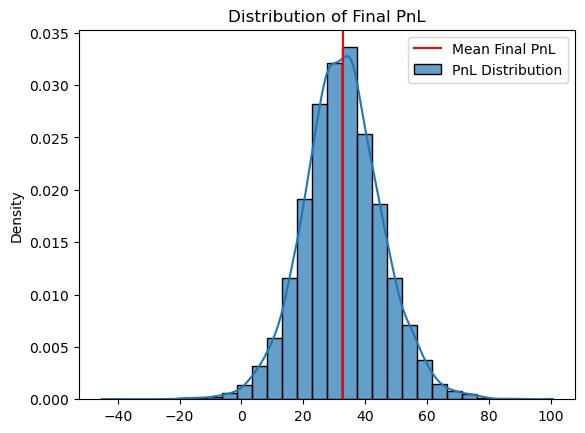

In [261]:
# plt.plot(X_paths[0,:], label='Cash X_t')
ax = sns.histplot(PnL_paths[:,-1], bins=30, alpha=0.7, kde=True, stat="density", label="PnL Distribution")
ax.set_title("Distribution of Final PnL")
ax.axvline(np.mean(PnL_paths[:,-1]), c='red', label='Mean Final PnL')
ax.legend()
np.mean(PnL_paths[:,-1])

In [265]:
optimal_V = 2* sum([C(gamma*l/2) for l in range(T+1)])
print("optimal_V=", optimal_V)
print("optimal_V mean PnL =", np.mean(PnL_paths[:,-1]))

optimal_V= 29.245421317437735
optimal_V mean PnL = 32.80715027383326


### Plot of $\delta$ vs $q$

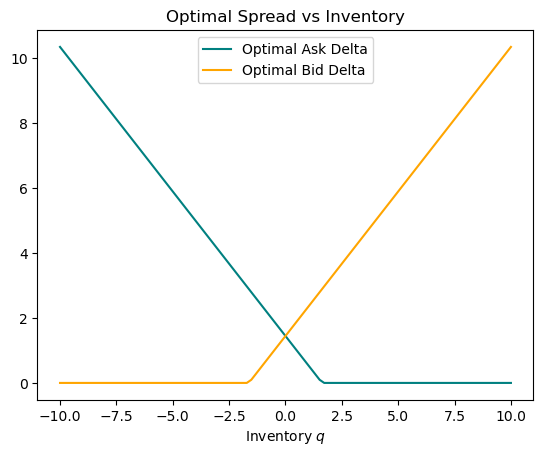

In [276]:
q = np.linspace(-10,10,100)
delta_a_opt = np.zeros(len(q))
delta_b_opt = np.zeros(len(q))
N = 10
T = 100
for n in range(len(q)):
    delta_a_opt[n] = Delta(gamma/2 * (T-N-1)*(1-2*q[n]))
    delta_b_opt[n] = Delta(gamma/2 * (T-N-1)*(1+2*q[n]))
plt.plot(q, delta_a_opt, label='Optimal Ask Delta', c="teal")
plt.plot(q, delta_b_opt, label='Optimal Bid Delta', c="orange")
plt.xlabel(r"Inventory $q$")
plt.title("Optimal Spread vs Inventory")
plt.legend()

### Variance of PnL vs Risk Aversion

In [283]:
gamma = np.linspace(0.001, 1, 100)
variances = np.zeros(len(gamma))
for i in range(len(gamma)):
    N = 1000
    PnL_paths = np.zeros((N, T+1))
    for j in range(N):
        S, q, X, PnL = simulation(S0, q0, X0, T, sigma, gamma[i])
        PnL_paths[j,:] = PnL
    variances[i] = np.var(PnL_paths[:,-1])



Text(0.5, 1.0, 'Variance of Final PnL vs Risk Aversion')

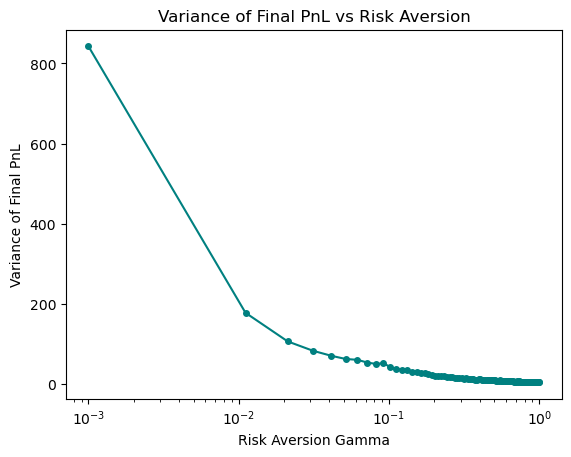

In [284]:
plt.plot(gamma, variances, marker='o', markersize=4, linestyle='-', c="teal")
plt.xlabel("Risk Aversion Gamma")
plt.ylabel("Variance of Final PnL")
plt.xscale('log')
plt.title("Variance of Final PnL vs Risk Aversion")

### Evolutions (for one simulation)

Text(0.5, 1.0, '$S_n$ (Asset Price over Time)')

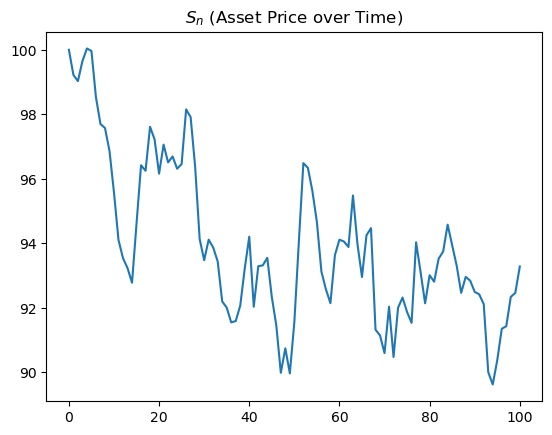

In [183]:
plt.plot(S)
plt.title(r'$S_n$ (Asset Price over Time)')

Text(0.5, 1.0, 'Inventory over Time')

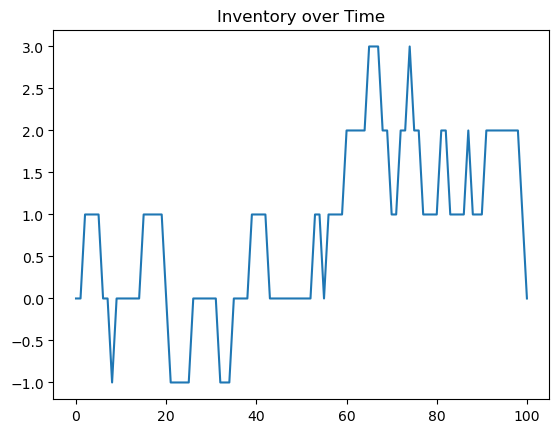

In [184]:
plt.plot(q)
plt.title('Inventory over Time')

Text(0.5, 1.0, 'Cash over Time')

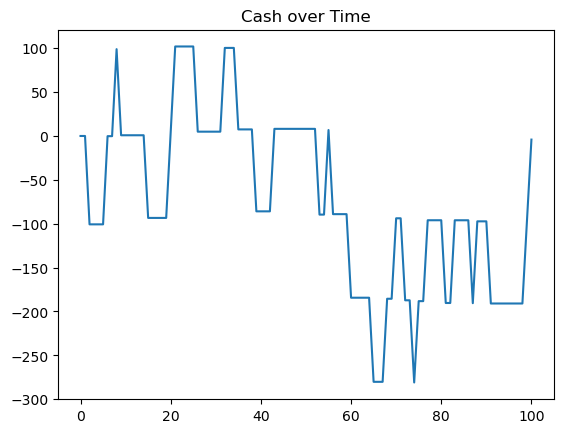

In [185]:
plt.plot(X)
plt.title('Cash over Time')

Text(0.5, 1.0, 'PnL over Time')

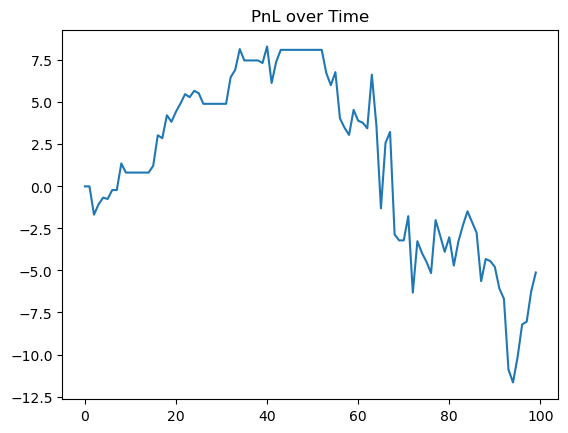

In [186]:
plt.plot(PnL)
plt.title('PnL over Time')

In [187]:
# def f(delta, alpha=0.5, k=1.0):
#     return alpha * np.exp(-k * delta)

# def delta_star(lmbda, alpha=0.5, k=1.0):
#     return np.maximum(0.0, lmbda + 1.0 / k)

# def compute_value_and_policy(N, q_min, q_max, gamma, alpha=0.5, k=1.0):

#     Q = np.arange(q_min, q_max + 1)
#     nQ = len(Q)

#     V = np.zeros((N + 1, nQ))   # V[N,:] = 0 terminal
#     delta_a = np.zeros((N, nQ))
#     delta_b = np.zeros((N, nQ))

#     def idx(q):
#         return q - q_min

#     for n in range(N - 1, -1, -1):        # backward in time
#         for i, q in enumerate(Q):
#             V_q  = V[n + 1, i]
#             V_qm = V[n + 1, idx(q - 1)] if q > q_min else V_q
#             V_qp = V[n + 1, idx(q + 1)] if q < q_max else V_q

#             lam_a = -(V_qm - V_q)  # = V_q - V_qm
#             lam_b = -(V_qp - V_q)  # = V_q - V_qp

#             # optimal spreads
#             da = delta_star(lam_a, alpha=alpha, k=k)
#             db = delta_star(lam_b, alpha=alpha, k=k)

#             fa = f(da, alpha=alpha, k=k)
#             fb = f(db, alpha=alpha, k=k)

#             # stage reward
#             stage = da * fa + db * fb - 0.5 * gamma * q**2

#             # expected continuation
#             EV_next = V_q + fa * (V_qm - V_q) + fb * (V_qp - V_q)

#             # Bellman update
#             V[n, i] = stage + EV_next
#             delta_a[n, i] = da
#             delta_b[n, i] = db

#     return Q, V, delta_a, delta_b


# def simulate_paths(M, N, Q, delta_a, delta_b,
#                    S0=100.0, sigma=1.0, alpha=0.5, k=1.0,
#                    seed=None):
    
#     rng = np.random.default_rng(seed)

#     q_min, q_max = Q[0], Q[-1]
#     nQ = len(Q)

#     def idx_clipped(q):
#         q_clipped = np.clip(q, q_min, q_max)
#         return int(q_clipped - q_min)

#     q_paths = np.zeros((M, N + 1), dtype=int)
#     X_paths = np.zeros((M, N + 1), dtype=float)
#     S_paths = np.zeros((M, N + 1), dtype=float)

#     S_paths[:, 0] = S0

#     for m in range(M):
#         q = 0
#         X = 0.0
#         S = S0

#         q_paths[m, 0] = q
#         X_paths[m, 0] = X
#         S_paths[m, 0] = S

#         for n in range(N):
#             # get optimal spreads for current inventory and time
#             i = idx_clipped(q)
#             da = delta_a[n, i]
#             db = delta_b[n, i]

#             fa = f(da, alpha=alpha, k=k)
#             fb = f(db, alpha=alpha, k=k)

#             # sample trade (η^a, η^b)
#             u = rng.uniform()
#             if u < fa:
#                 eta_a, eta_b = 1, 0  # sell 1 at ask
#             elif u < fa + fb:
#                 eta_a, eta_b = 0, 1  # buy 1 at bid
#             else:
#                 eta_a, eta_b = 0, 0  # no trade

#             # update cash and inventory
#             bid = S - db
#             ask = S + da

#             if eta_a == 1:      # ask trade: sell 1
#                 X += ask
#                 q -= 1
#             elif eta_b == 1:    # bid trade: buy 1
#                 X -= bid
#                 q += 1

#             # evolve mid-price
#             S += sigma * rng.normal()

#             q_paths[m, n+1] = q
#             X_paths[m, n+1] = X
#             S_paths[m, n+1] = S

#     # terminal wealth
#     W_term = X_paths[:, -1] + q_paths[:, -1] * S_paths[:, -1]
#     return q_paths, X_paths, S_paths, W_term

In [188]:
# N = 50           # horizon
# gamma = 0.1      # inventory risk aversion
# q_min, q_max = -10, 10
# alpha = 0.5
# k = 1.0

# Q, V, da_star, db_star = compute_value_and_policy(
#     N=N,
#     q_min=q_min,
#     q_max=q_max,
#     gamma=gamma,
#     alpha=alpha,
#     k=k
# )

# print("Approximate V(0,0) from DP:", V[0, Q == 0][0])

# # Simulation parameters
# M = 10_000       # number of paths
# S0 = 100.0
# sigma = 1.0

# q_paths, X_paths, S_paths, W_term = simulate_paths(
#     M=M,
#     N=N,
#     Q=Q,
#     delta_a=da_star,
#     delta_b=db_star,
#     S0=S0,
#     sigma=sigma,
#     alpha=alpha,
#     k=k,
#     seed=42
# )

# PnL = W_term  # since initial wealth is 0 here

# print("Empirical mean P&L:", np.mean(PnL))
# print("Empirical std  P&L:", np.std(PnL))

# # Simple histogram of P&L
# plt.figure()
# sns.histplot(PnL, bins=50, kde=True)
# plt.xlabel("P&L")
# plt.ylabel("Density")
# plt.title("Empirical P&L distribution under optimal policy")
# plt.show()

In [189]:
# plt.plot(X_paths[2,:], label='Cash X_t')